In [19]:
import numpy as np
import pandas as pd
mnist_df = pd.read_csv('../Datasets/mnist.csv', index_col='idx')

# Read the CSV file into a DataFrame and specify the index column
mnist_df.sample(5)

,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,pix_9,...,pix_775,pix_776,pix_777,pix_778,pix_779,pix_780,pix_781,pix_782,pix_783,target
idx,,,,,,,,,,,,,,,,,,,,,
46295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
38700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
39345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
28138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
43418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [20]:
X = mnist_df.drop(['target'], axis=1).to_numpy()
print("Type if X is : {0} and Shape is : {1}".format(type(X), X.shape))

y = mnist_df[['target']].to_numpy()
y = y.ravel()
print("y type : {0}, y Shape : {1} ".format(type(y), y.shape))

Type if X is : <class 'numpy.ndarray'> and Shape is : (70000, 784)
y type : <class 'numpy.ndarray'>, y Shape : (70000,) 


Value at position 722 is 5 



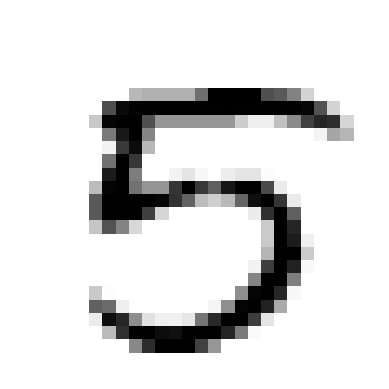

In [21]:
import matplotlib.pyplot as plt

# show a data-point as image
def plotimage(ds, pos):
    assert(pos <= ds.shape[0])
    
    if pos == -1:
        plt.imshow(ds.reshape((28,28)), cmap='binary')
    else:
        print("Value at position {0} is {1} \n".format(pos,y[pos]))
        plt.imshow(ds[pos].reshape((28,28)), cmap='binary')
    plt.axis("off")

plotimage(X, 722)
plt.show()



In [22]:
# Note: Train/test split should bbe done in such a way that all 
# numbers have sufficient representations in both the datasets
# Note: Shall we use pandas 'cut' method to make it correct representation of the classes of interest?
# we can safely select first 60000 as training because its already segregated in the given dataset
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

clf = make_pipeline(PCA(random_state = 42), RandomForestClassifier(random_state=42))
param_distrib = { "pca__n_components": np.arange(10, 80),
                    "randomforestclassifier__n_estimators": np.arange(50, 500)}
rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=3, random_state = 42)
rnd_search.fit(X_train[:10000], y_train[:10000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [24]:
rnd_search.best_params_

{'randomforestclassifier__n_estimators': 475, 'pca__n_components': 57}

In [25]:
y_pred = rnd_search.predict((X_train))

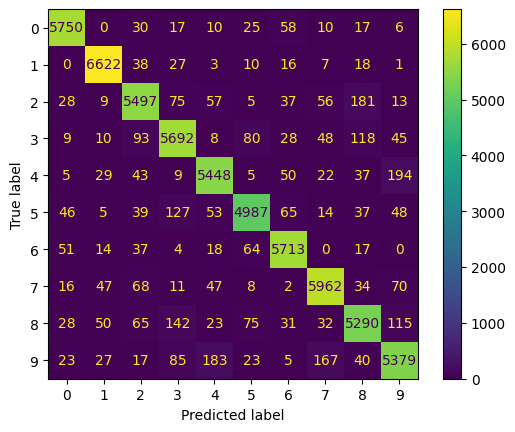

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train, y_pred)

# sample_weight = (y_pred != y_train)
# ConfusionMatrixDisplay.from_predictions(y_train, y_pred,sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.show()

In [66]:
# Generatlization of confusion matrix
# here we take average for all the classes to assess the model performance
from sklearn.metrics import accuracy_score

cls = [0,1,2,3,4,5,6,7,8,9]
tp, fp, fn, tn = 0,0,0,0

for cl in cls:
    tp_temp = sum((y_train == cl) & (y_pred == cl))
    fn_temp = sum((y_train == cl) & (y_pred != cl))
    tn_temp = sum((y_train != cl) & (y_pred != cl))
    fp_temp = sum((y_train != cl) & (y_pred == cl))

    tp = tp + tp_temp
    fn = fn + fn_temp
    tn = tn + tn_temp
    fp = fp + fp_temp

# avg metrices
tp = tp/len(cls)
fn = fn/len(cls)
tn = tn/len(cls)
fp = fp/len(cls)

print("Accuracy = {accuracy_score(y_train, y_pred)}")

print(f"TN ({tn}) ------ FP ({fp})")
print(f"FN ({fn})   ------ TP ({tp})")

print(f"Precision = {tp/(tp+fp)}")
print(f"Recall = {tp/(tp+fn)}")
print(f"f1 Score = {(tp/(tp + (fn+fp)/2))}" )



Accuracy = {accuracy_score(y_train, y_pred)}
TN (53634.0) ------ FP (366.0)
FN (366.0)   ------ TP (5634.0)
Precision = 0.939
Recall = 0.939
f1 Score = 0.939


In [67]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_reduced

array([[ 123.93258866, -312.67426202,  -24.51405176, ...,   55.01899792,
         -20.08327427,   39.58995229],
       [1011.71837587, -294.85703827,  596.33956104, ...,    7.24129874,
         -12.45780869,  -12.7432306 ],
       [ -51.84960805,  392.17315286, -188.50974943, ...,  -54.19582221,
          48.47979747,  -73.27826256],
       ...,
       [-178.0534496 ,  160.07821109, -257.61308227, ...,   55.54485537,
          87.99883556,   -5.78979735],
       [ 130.60607208,   -5.59193642,  513.85867395, ...,   23.30835402,
           5.06237836,  -65.26525587],
       [-173.43595244,  -24.71880226,  556.01889393, ...,   52.4956069 ,
          12.63192292,  -45.74001227]])

In [68]:
filename = "my_mnist.mmap"
X_mmap = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mmap[:] = X_train # could be a loop instead, saving the data chunk by chunk 
X_mmap.flush()

In [73]:
from sklearn.decomposition import IncrementalPCA
n_batches = 10000
X_mmap = np.memmap(filename, dtype="float32", mode="readonly").reshape(-1,784)
batch_size = n_batches  # X_mmap.shape[0]
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
reduced = inc_pca.fit(X_mmap)

In [75]:
reduced.components_.shape


(154, 784)

In [79]:
n = 20000
d = 7300
m = 60000
np.random.seed(42)
P = np.random.randn(d, n) / np.sqrt(d) # std dev = square root of variance
X = np.random.randn(m, n) # generate a fake dataset 
X_reduced = X @ P.T

In [81]:
np.random.seed(42)
P2 = np.random.randn(n, d) / np.sqrt(d) # std dev = square root of variance
X2 = np.random.randn(m, n) # generate a fake dataset 
X_reduced2 = X2 @ P2
X_reduced2

array([[-1.73514426,  0.59356262,  1.86451915, ...,  1.96344887,
        -1.51890242, -0.67065071],
       [ 1.01501442, -1.84142369, -0.05094971, ..., -1.64752388,
        -0.49048492,  0.42811618],
       [-1.45697252, -3.72877426, -2.23170518, ..., -0.26174497,
        -0.55848936, -3.24634538],
       ...,
       [ 1.09490316, -0.12909846, -1.36602973, ..., -0.68782546,
         3.20476522, -1.46006472],
       [-4.37896018, -1.21737399,  0.26203582, ..., -2.90615512,
         2.43637822,  1.959892  ],
       [-2.27318039, -1.88677338, -1.28348589, ..., -0.90842107,
         1.50108143, -2.17667895]])

In [80]:
X_reduced

array([[ 0.65601016, -1.52157349, -2.13016582, ..., -3.30298058,
         1.86509223, -0.62205374],
       [-1.15983875, -1.31973727,  0.13553982, ..., -0.9461484 ,
        -0.01875402,  1.15834454],
       [-2.79258363,  0.47631317, -3.2293912 , ...,  1.41899815,
         3.03817514, -2.07598188],
       ...,
       [-0.55641718, -0.31983795, -1.15321116, ..., -2.41034505,
         1.99337176, -0.66911217],
       [ 2.8888728 ,  1.99090186,  1.15936578, ...,  0.37590407,
        -0.80402395,  3.95974259],
       [ 0.12324474,  1.47977494,  0.09177184, ..., -1.12645088,
         1.40939363, -1.16669409]])